# Probability Plots

Used sources:

- https://ggplot2.tidyverse.org/reference/geom_qq.html
- https://homepage.divms.uiowa.edu/~luke/classes/STAT4580/qqpp.html
- https://www.smu.edu/-/media/Site/Dedman/Departments/Statistics/TechReports/TR-165.pdf


Additional sources:

- https://cran.r-project.org/web/packages/qqplotr/vignettes/introduction.html

## Preparation


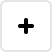
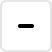
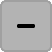
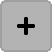
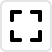
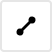
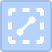
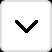
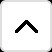
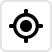

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, skewnorm, laplace, uniform

from lets_plot import *
LetsPlot.setup_html()

In [2]:
mtcars_df = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")
print(mtcars_df.shape)
mtcars_df.head()

(32, 12)


model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

## Definition

In [3]:
def qq_stat(df, feature):
    n = df[feature].size
    t = (np.arange(1, n + 1) - 0.5) / n
    stat_x = np.sort(np.random.normal(size=n)) # norm.ppf(t)
    stat_y = df[feature].sort_values(ignore_index=True)

    return {"x": stat_x, "y": stat_y}

ggplot() + \
    geom_point(aes("x", "y"), data=qq_stat(mtcars_df, "mpg")) + \
    labs(x="theoretical quantiles", y="sample quantiles")

In [4]:
def pp_stat(df, feature):
    y = df[feature]
    n = y.size
    stat_x = (np.arange(1, n + 1) - 0.5) / n
    stat_y = np.sort(norm.cdf((y - y.mean()) / y.std()))

    return {"x": stat_x, "y": stat_y}

ggplot() + \
    geom_point(aes("x", "y"), data=pp_stat(mtcars_df, "mpg")) + \
    lims([0, 1], [0, 1]) + \
    coord_fixed() + \
    labs(x="theoretical probabilities", y="sample probabilities")

In [5]:
def sp_stat(df, feature):
    y = df[feature]
    n = y.size
    t = (np.arange(1, n + 1) - 0.5) / n
    u = np.sort(norm.cdf((y - y.mean()) / y.std()))
    stat_x = 2 / np.pi * np.arcsin(np.sqrt(t))
    stat_y = 2 / np.pi * np.arcsin(np.sqrt(u))

    return {"x": stat_x, "y": stat_y}

ggplot() + \
    geom_point(aes("x", "y"), data=sp_stat(mtcars_df, "mpg")) + \
    lims([0, 1], [0, 1]) + \
    coord_fixed() + \
    labs(x="stabilized theoretical probabilities", y="stabilized sample probabilities")

## Bigger example

In [6]:
income_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/US_household_income_2017.csv", encoding_errors='ignore')
print(income_df.shape)
income_df.head()

(32526, 19)


id  State_Code State_Name State_ab          County            City  \
0  1011000           1    Alabama       AL   Mobile County       Chickasaw   
1  1011010           1    Alabama       AL  Barbour County      Louisville   
2  1011020           1    Alabama       AL   Shelby County      Columbiana   
3  1011030           1    Alabama       AL   Mobile County         Satsuma   
4  1011040           1    Alabama       AL   Mobile County  Dauphin Island   

             Place  Type Primary  Zip_Code Area_Code     ALand     AWater  \
0   Chickasaw city  City   place     36611       251  10894952     909156   
1        Clio city  City   place     36048       334  26070325      23254   
2  Columbiana city  City   place     35051       205  44835274     261034   
3      Creola city  City   place     36572       251  36878729    2374530   
4   Dauphin Island  Town   place     36528       251  16204185  413605152   

         Lat        Lon   Mean  Median  Stdev        sum_w  
0  30.771450 -88.079697  38773   30506  33101  1638.260513  
1  31.708516 -85.611039  37725   19528  43789   258.017685  
2  33.191452 -86.615618  54606   31930  57348   926.031000  
3  30.874343 -88.009442  63919   52814  47707   378.114619  
4  30.250913 -88.171268  77948   67225  54270   282.320328

In [7]:
p1 = ggplot() + \
    geom_point(aes("x", "y"), data=qq_stat(income_df, "Mean")) + \
    labs(x="theoretical quantiles", y="sample quantiles") + \
    ggtitle("Mean: Q-Q plot")
p2 = ggplot() + \
    geom_point(aes("x", "y"), data=pp_stat(income_df, "Mean")) + \
    labs(x="theoretical probabilities", y="sample probabilities") + \
    ggtitle("Mean: P-P plot")
p3 = ggplot() + \
    geom_point(aes("x", "y"), data=sp_stat(income_df, "Mean")) + \
    labs(x="stabilized theoretical probabilities", y="stabilized sample probabilities") + \
    ggtitle("Mean: S-P plot")

w, h = 320, 240
bunch = GGBunch()
bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p2, w, 0, w, h)
bunch.add_plot(p3, 2 * w, 0, w, h)
bunch.show()

## Deviations

In [8]:
n = 1000
df1 = pd.DataFrame({"x": norm.rvs(size=n, random_state=42)})
df2 = pd.DataFrame({"x": skewnorm.rvs(7, size=n, random_state=42)})
df3 = pd.DataFrame({"x": uniform.rvs(size=n, random_state=42)})
df4 = pd.DataFrame({"x": laplace.rvs(size=n, random_state=42)})

In [9]:
p11 = ggplot(df1, aes(x="x")) + geom_histogram() + ggtitle("Normal: histogram")
p12 = ggplot() + geom_point(aes("x", "y"), data=qq_stat(df1, "x")) + ggtitle("Normal: Q-Q plot")
p13 = ggplot() + geom_point(aes("x", "y"), data=pp_stat(df1, "x")) + ggtitle("Normal: P-P plot")
p14 = ggplot() + geom_point(aes("x", "y"), data=sp_stat(df1, "x")) + ggtitle("Normal: S-P plot")
p21 = ggplot(df2, aes(x="x")) + geom_histogram() + ggtitle("Skewed: histogram")
p22 = ggplot() + geom_point(aes("x", "y"), data=qq_stat(df2, "x")) + ggtitle("Skewed: Q-Q plot")
p23 = ggplot() + geom_point(aes("x", "y"), data=pp_stat(df2, "x")) + ggtitle("Skewed: P-P plot")
p24 = ggplot() + geom_point(aes("x", "y"), data=sp_stat(df2, "x")) + ggtitle("Skewed: S-P plot")
p31 = ggplot(df3, aes(x="x")) + geom_histogram() + ggtitle("-Kurtosis: histogram")
p32 = ggplot() + geom_point(aes("x", "y"), data=qq_stat(df3, "x")) + ggtitle("-Kurtosis: Q-Q plot")
p33 = ggplot() + geom_point(aes("x", "y"), data=pp_stat(df3, "x")) + ggtitle("-Kurtosis: P-P plot")
p34 = ggplot() + geom_point(aes("x", "y"), data=sp_stat(df3, "x")) + ggtitle("-Kurtosis: S-P plot")
p41 = ggplot(df4, aes(x="x")) + geom_histogram() + ggtitle("+Kurtosis: histogram")
p42 = ggplot() + geom_point(aes("x", "y"), data=qq_stat(df4, "x")) + ggtitle("+Kurtosis: Q-Q plot")
p43 = ggplot() + geom_point(aes("x", "y"), data=pp_stat(df4, "x")) + ggtitle("+Kurtosis: P-P plot")
p44 = ggplot() + geom_point(aes("x", "y"), data=sp_stat(df4, "x")) + ggtitle("+Kurtosis: S-P plot")

w, h = 250, 190
bunch = GGBunch()
bunch.add_plot(p11, 0, 0, w, h)
bunch.add_plot(p12, w, 0, w, h)
bunch.add_plot(p13, 2 * w, 0, w, h)
bunch.add_plot(p14, 3 * w, 0, w, h)
bunch.add_plot(p21, 0, h, w, h)
bunch.add_plot(p22, w, h, w, h)
bunch.add_plot(p23, 2 * w, h, w, h)
bunch.add_plot(p24, 3 * w, h, w, h)
bunch.add_plot(p31, 0, 2 * h, w, h)
bunch.add_plot(p32, w, 2 * h, w, h)
bunch.add_plot(p33, 2 * w, 2 * h, w, h)
bunch.add_plot(p34, 3 * w, 2 * h, w, h)
bunch.add_plot(p41, 0, 3 * h, w, h)
bunch.add_plot(p42, w, 3 * h, w, h)
bunch.add_plot(p43, 2 * w, 3 * h, w, h)
bunch.add_plot(p44, 3 * w, 3 * h, w, h)
bunch.show()